# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import joblib

plt.style.available
sns.set_palette('colorblind')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [134]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [135]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [136]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

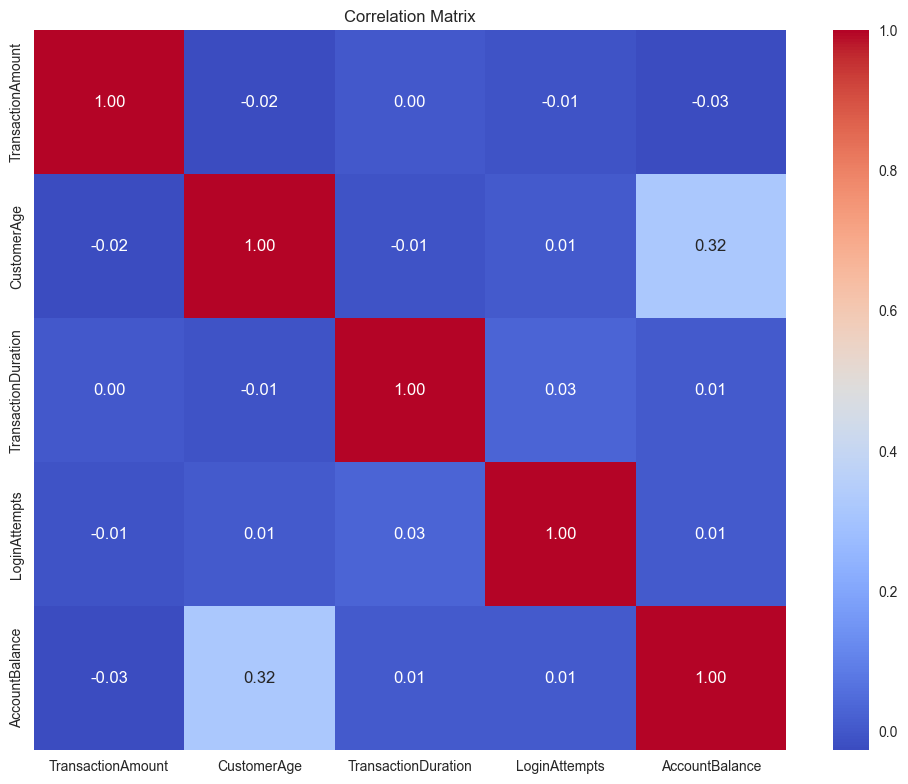

In [137]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_df = df.select_dtypes(include=['float64', 'int64'])  #ini biar yang dipilih kolom bertipe data numerik
correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

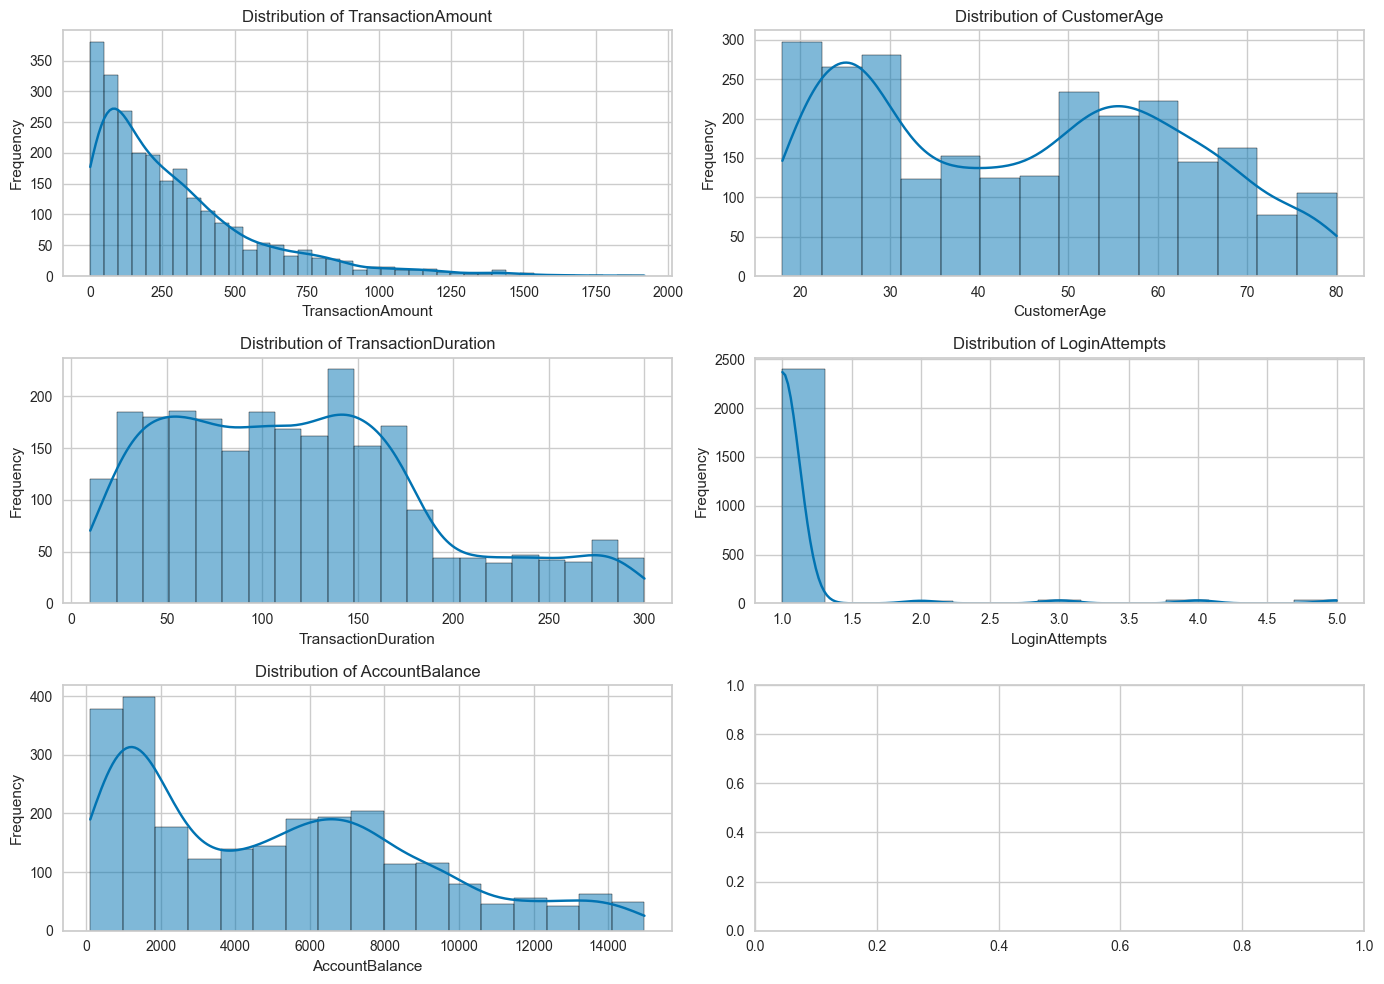

In [138]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=(len(numeric_columns)+1)//2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [139]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [140]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [141]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [142]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("Dataset after scaling:")
df_scaled.describe()

Dataset after scaling:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,0.154987,0.430297,0.377320,0.030405,0.336914
std,0.152295,0.287699,0.241650,0.148617,0.262018
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042239,0.145161,0.182759,0.000000,0.094340
50%,0.110014,0.435484,0.351724,0.000000,0.311416
75%,0.215152,0.661290,0.520690,0.000000,0.508945
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_columns = [col for col in df_scaled.columns if 'id' in col.lower() or 'ip' in col.lower()]
df_cleaned = df_scaled.drop(columns=id_columns, errors='ignore')
print(f"Dropped columns: {id_columns}")
print(f"Remaining columns: {df_cleaned.columns.tolist()}")
df_cleaned.head()

Dropped columns: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
Remaining columns: ['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [144]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
categorical_features = df_cleaned.select_dtypes(include=['object']).columns

if len(categorical_features) > 0:
    df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features)
    print(f"Encoded categorical features: {categorical_features.tolist()}")
    print(f"New shape after encoding: {df_encoded.shape}")
else:
    df_encoded = df_cleaned
    print("No categorical features to encode")

df_encoded.head()

Encoded categorical features: ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']
New shape after encoding: (2537, 2902)


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate_2023-01-02 16:00:06,TransactionDate_2023-01-02 16:01:14,TransactionDate_2023-01-02 16:01:26,TransactionDate_2023-01-02 16:06:29,TransactionDate_2023-01-02 16:07:17,...,PreviousTransactionDate_2024-11-04 08:12:14,PreviousTransactionDate_2024-11-04 08:12:15,PreviousTransactionDate_2024-11-04 08:12:16,PreviousTransactionDate_2024-11-04 08:12:17,PreviousTransactionDate_2024-11-04 08:12:18,PreviousTransactionDate_2024-11-04 08:12:19,PreviousTransactionDate_2024-11-04 08:12:20,PreviousTransactionDate_2024-11-04 08:12:21,PreviousTransactionDate_2024-11-04 08:12:22,PreviousTransactionDate_2024-11-04 08:12:23
0,0.007207,0.838710,0.244828,0.0,0.336832,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.195940,0.806452,0.451724,0.0,0.918055,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.065680,0.016129,0.158621,0.0,0.068637,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.096016,0.129032,0.051724,0.0,0.569198,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.006874,NaN,0.648276,0.0,0.492591,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [145]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_encoded.fillna(df_encoded.mean(), inplace=True)

In [146]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_encoded.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [147]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [148]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [149]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_encoded.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000
mean,0.155028,0.429579,0.377697,0.030671,0.337132
std,0.151664,0.286277,0.240111,0.148619,0.260618
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043180,0.145161,0.182759,0.000000,0.095324
50%,0.111087,0.435484,0.358621,0.000000,0.318555
75%,0.213326,0.661290,0.520690,0.000000,0.506842
max,1.000000,1.000000,1.000000,1.000000,1.000000


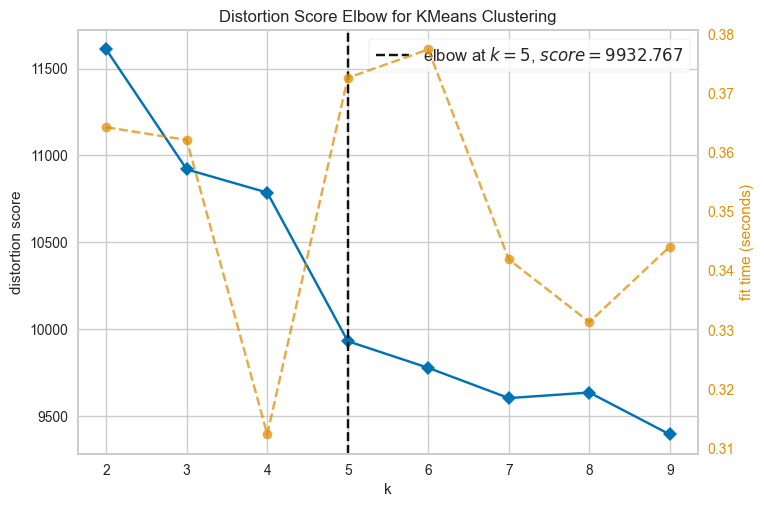

angka optimal untuk cluster teresebut adalah: 5


In [150]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df_encoded)
visualizer.show()

optimal_k = visualizer.elbow_value_
print(f"angka optimal untuk cluster teresebut adalah: {optimal_k}")

In [151]:
# Menggunakan algoritma K-Means Clustering
# Using the optimal k value found above, or 3 if not determined
k = optimal_k if optimal_k else 3

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(df_encoded)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataframe
df_clustered = df_encoded.copy()
df_clustered['Cluster'] = cluster_labels

# Display the count of samples in each cluster
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
print("Number of samples in each cluster:")
print(cluster_counts)

# Display cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.columns)
print("\nCluster Centers:")
cluster_centers

Number of samples in each cluster:
Cluster
0    495
1    517
2    451
3    563
4    489
Name: count, dtype: int64

Cluster Centers:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate_2023-01-02 16:00:06,TransactionDate_2023-01-02 16:01:14,TransactionDate_2023-01-02 16:01:26,TransactionDate_2023-01-02 16:06:29,TransactionDate_2023-01-02 16:07:17,...,PreviousTransactionDate_2024-11-04 08:12:14,PreviousTransactionDate_2024-11-04 08:12:15,PreviousTransactionDate_2024-11-04 08:12:16,PreviousTransactionDate_2024-11-04 08:12:17,PreviousTransactionDate_2024-11-04 08:12:18,PreviousTransactionDate_2024-11-04 08:12:19,PreviousTransactionDate_2024-11-04 08:12:20,PreviousTransactionDate_2024-11-04 08:12:21,PreviousTransactionDate_2024-11-04 08:12:22,PreviousTransactionDate_2024-11-04 08:12:23
0,0.149785,0.505931,0.381391,0.036166,0.581806,3.252607e-19,3.252607e-19,3.252607e-19,2.020202e-03,3.252607e-19,...,0.002020,2.020202e-03,6.505213e-19,4.040404e-03,0.012121,6.060606e-03,4.040404e-03,2.020202e-03,0.004040,6.505213e-19
1,0.159173,0.081041,0.376700,0.028648,0.100851,1.934236e-03,4.336809e-19,4.336809e-19,4.336809e-19,4.336809e-19,...,0.001934,3.469447e-18,8.673617e-19,1.934236e-03,0.005803,-1.301043e-18,1.934236e-03,3.469447e-18,0.009671,8.673617e-19
2,0.154508,0.756518,0.380547,0.022645,0.302141,3.252607e-19,3.252607e-19,3.252607e-19,3.252607e-19,2.217295e-03,...,0.004435,6.651885e-03,6.505213e-19,2.217295e-03,0.002217,2.217295e-03,2.217295e-03,2.217295e-03,0.004435,2.217295e-03
3,0.160269,0.453524,0.374067,0.036628,0.347120,4.336809e-19,1.776199e-03,4.336809e-19,4.336809e-19,4.336809e-19,...,0.005329,1.776199e-03,1.776199e-03,5.328597e-03,0.003552,-3.035766e-18,1.776199e-03,7.104796e-03,0.001776,1.776199e-03
4,0.150396,0.391683,0.376560,0.027794,0.360040,2.710505e-19,2.710505e-19,2.044990e-03,2.710505e-19,2.710505e-19,...,0.002045,6.134969e-03,2.044990e-03,-4.770490e-18,0.002045,2.044990e-03,-1.301043e-18,4.089980e-03,0.006135,5.421011e-19


Jalankan cell code ini untuk menyimpan model kamu.

In [164]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")
print("Model saved successfully as 'model_clustering.h5'")

Model saved successfully as 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [153]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_encoded, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.0934


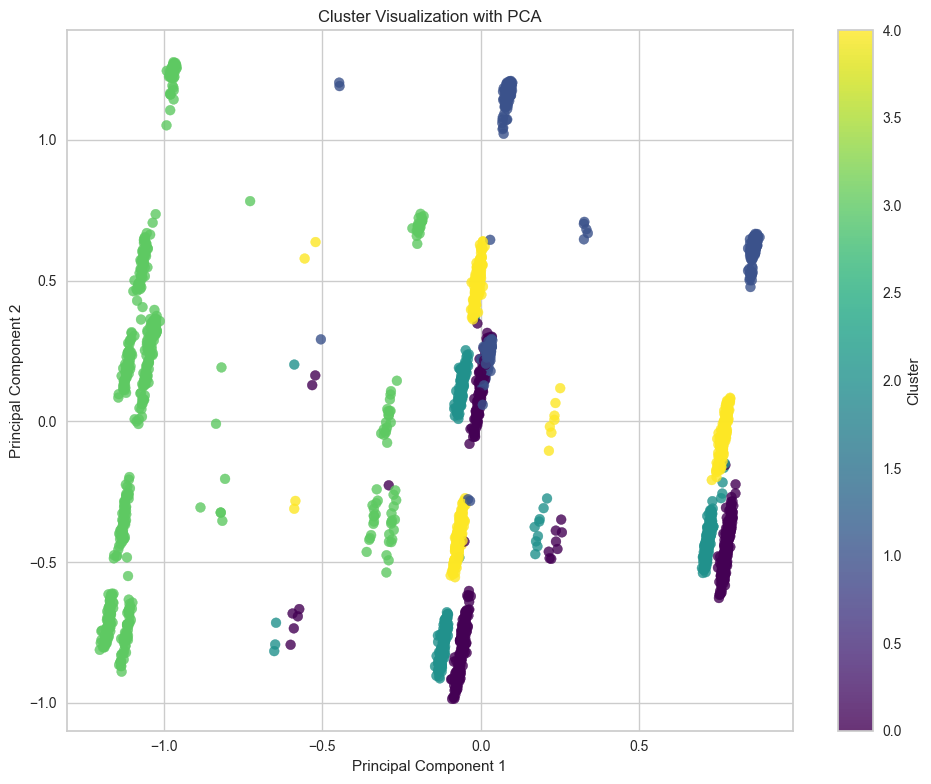

Explained variance ratio: [0.08430433 0.06754614]
Total explained variance: 0.1519


In [154]:
# Membuat visualisasi hasil clustering
if df_encoded.shape[1] > 2:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_encoded)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
    plt.colorbar(label='Cluster')
    plt.title('Cluster Visualization with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")
else:
    # If only 2 features, plot directly
    cols = df_encoded.columns[:2]
    plt.figure(figsize=(10, 8))
    plt.scatter(df_encoded[cols[0]], df_encoded[cols[1]], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)
    plt.colorbar(label='Cluster')
    plt.title(f'Cluster Visualization with {cols[0]} and {cols[1]}')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.tight_layout()
    plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [155]:
# Membangun model menggunakan PCA.

In [156]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [163]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
cluster_analysis = df_clustered.groupby('Cluster').agg({
    col: ['mean', 'min', 'max'] for col in df_encoded.columns if col != 'Cluster'
})

print("Cluster Analysis:")
cluster_analysis

Cluster Analysis:


TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0                0.149785  0.000459  1.000000    0.505931  0.161290  0.838710   
1                0.159173  0.000000  0.918269    0.081041  0.000000  0.430297   
2                0.154508  0.000495  0.858577    0.756518  0.430297  1.000000   
3                0.160269  0.000922  0.954092    0.453524  0.000000  1.000000   
4                0.150396  0.000031  0.953561    0.391683  0.129032  0.677419   

        TransactionDuration                     LoginAttempts  ...  \
                       mean       min       max          mean  ...   
Cluster                                                        ...   
0                  0.381391  0.000000  1.000000      0.036166  ...   
1                  0.376700  0.003448  0.996552      0.028648  ...   
2                  0.380547  0.003448  0.986207      0.022645  ...   
3                  0.374067  0.000000  0.979310      0.036628  ...   
4                  0.376560  0.000000  1.000000      0.027794  ...   

        PreviousTransactionDate_2024-11-04 08:12:20  \
                                                max   
Cluster                                               
0                                              True   
1                                              True   
2                                              True   
3                                              True   
4                                             False   

        PreviousTransactionDate_2024-11-04 08:12:21                \
                                               mean    min    max   
Cluster                                                             
0                                          0.002020  False   True   
1                                          0.000000  False  False   
2                                          0.002217  False   True   
3                                          0.007105  False   True   
4                                          0.004090  False   True   

        PreviousTransactionDate_2024-11-04 08:12:22               \
                                               mean    min   max   
Cluster                                                            
0                                          0.004040  False  True   
1                                          0.009671  False  True   
2                                          0.004435  False  True   
3                                          0.001776  False  True   
4                                          0.006135  False  True   

        PreviousTransactionDate_2024-11-04 08:12:23                
                                               mean    min    max  
Cluster                                                            
0                                          0.000000  False  False  
1                                          0.000000  False  False  
2                                          0.002217  False   True  
3                                          0.001776  False   True  
4                                          0.000000  False  False  

[5 rows x 8706 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [158]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [159]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [160]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [161]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [162]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)